In [ ]:
#Setup

In [1]:
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [9]:
28 * 28

784

Saving figure some_digit_plot


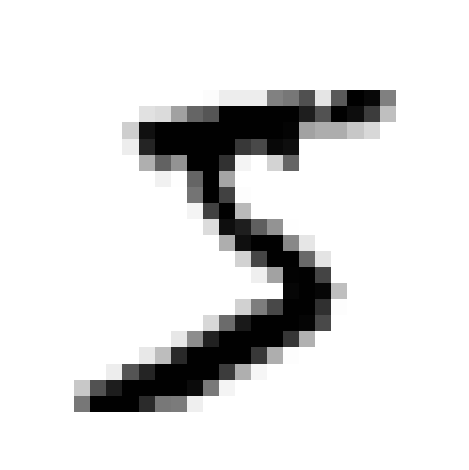

In [11]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [13]:
y[0]

'5'

In [15]:
y = y.astype(np.uint8)

In [17]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [19]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


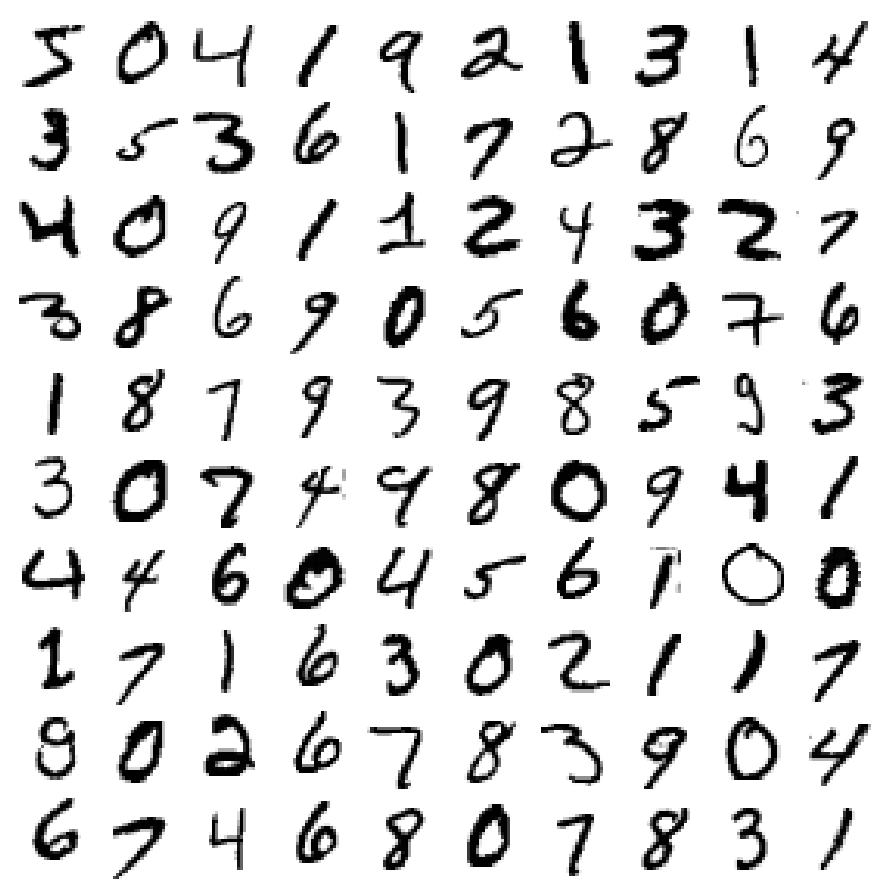

In [21]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [23]:
y[0]

5

In [25]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [27]:
# Training a Binary Classifier

In [29]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [31]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [33]:
sgd_clf.predict([some_digit])

array([ True])

In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [40]:
#KNN classifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [39]:
y_knn_pred = knn_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

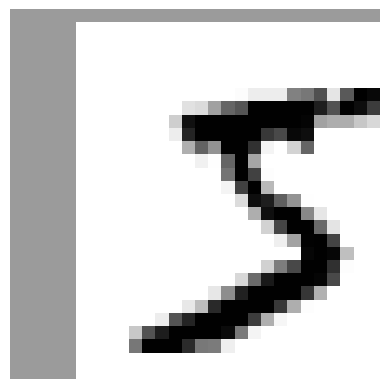

In [40]:
from scipy.ndimage import shift
def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

plot_digit(shift_digit(some_digit, 5, 1, new=100))

In [54]:
X_train_expanded = [X_train]
y_train_expanded = [y_train]
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    shifted_images = np.apply_along_axis(shift_digit, axis=1, arr=X_train, dx=dx, dy=dy)
    X_train_expanded.append(shifted_images)
    y_train_expanded.append(y_train)

X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
X_train_expanded.shape, y_train_expanded.shape

((300000, 784), (300000,))

In [56]:
knn_clf.fit(X_train_expanded, y_train_expanded)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [58]:
y_knn_expanded_pred = knn_clf.predict(X_test)

In [60]:
accuracy_score(y_test, y_knn_expanded_pred)

0.9763

In [62]:
ambiguous_digit = X_test[2589]
knn_clf.predict_proba([ambiguous_digit])

array([[0.24579675, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.75420325]])

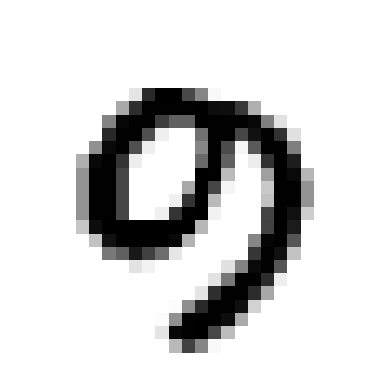

In [64]:
plot_digit(ambiguous_digit)

In [66]:
#grid search with cross validations for knn With Over 97% Accuracy

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import numpy as np

# Reduce dimensions using PCA to avoid memory issues
pca = PCA(n_components=50)  
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

# Define the KNN classifier
knn_clf = KNeighborsClassifier()

# Define the parameter grid to search for the best hyperparameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance']  
}


grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy', verbose=3, n_jobs=-1)  # n_jobs=-1 uses all processors


grid_search.fit(X_train_reduced, y_train)


print("Best parameters found by Grid Search:", grid_search.best_params_)


best_knn_clf = grid_search.best_estimator_
best_knn_clf.fit(X_train_reduced, y_train)


y_knn_pred = best_knn_clf.predict(X_test_reduced)
accuracy = accuracy_score(y_test, y_knn_pred)
print("Test set accuracy with best hyperparameters:", accuracy)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found by Grid Search: {'n_neighbors': 5, 'weights': 'distance'}
Test set accuracy with best hyperparameters: 0.9761


In [ ]:
#Confusion matrix for knn classifier

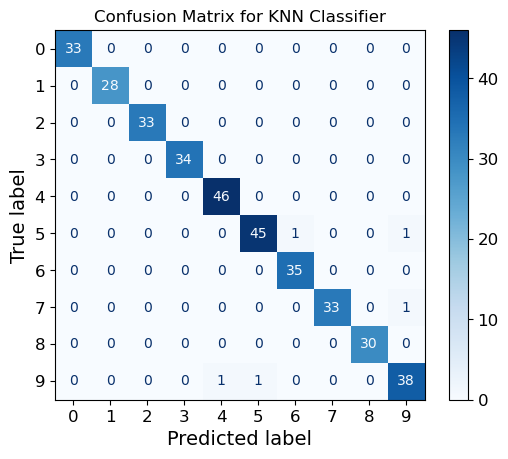

In [47]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Load the dataset (using MNIST-like digits dataset as an example)
digits = load_digits()
X, y = digits.data, digits.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


knn_clf = KNeighborsClassifier()


knn_clf.fit(X_train, y_train)


y_pred = knn_clf.predict(X_test)


cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for KNN Classifier")
plt.show()


In [ ]:
#learning curves for knn classifier

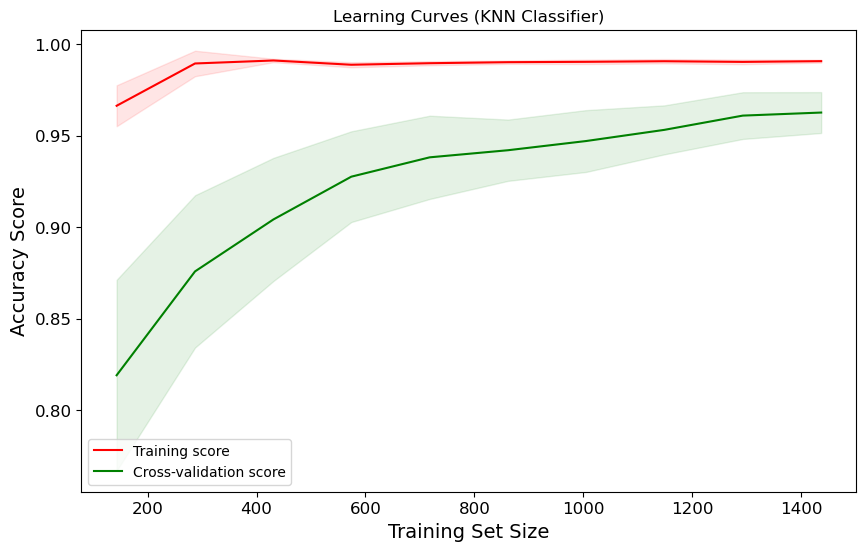

In [59]:

from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, train_test_split
import matplotlib.pyplot as plt
import numpy as np


digits = load_digits()
X, y = digits.data, digits.target


knn_clf = KNeighborsClassifier()


train_sizes, train_scores, test_scores = learning_curve(knn_clf, X, y, cv=5, scoring='accuracy', 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training score", color="r")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color="g")


plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color="g", alpha=0.1)


plt.title('Learning Curves (KNN Classifier)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc="best")


plt.show()

In [ ]:
#accuracy for SGD classifier

In [43]:

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits


digits = load_digits()
X, y = digits.data, digits.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


sgd_clf = SGDClassifier(random_state=42)


sgd_clf.fit(X_train, y_train)

y_pred = sgd_clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the SGD Classifier: {accuracy * 100:.2f}%")


Accuracy of the SGD Classifier: 95.56%


In [ ]:
#confusion matrix for sgdclassifier

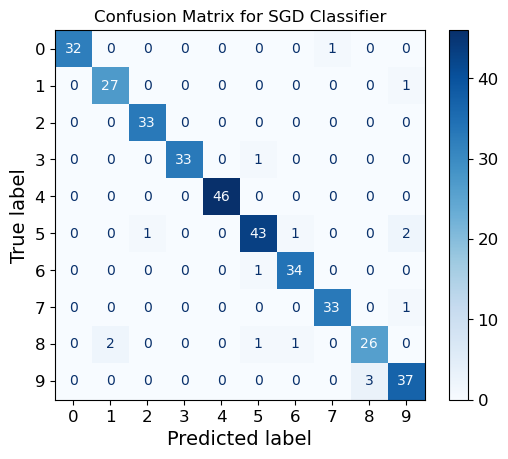

In [49]:
# Import necessary libraries
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt


digits = load_digits()
X, y = digits.data, digits.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


sgd_clf = SGDClassifier(random_state=42)

sgd_clf.fit(X_train, y_train)


y_pred = sgd_clf.predict(X_test)


cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can change the color map as needed
plt.title('Confusion Matrix for SGD Classifier')
plt.show()

In [ ]:
#learning curves for sgd regressor

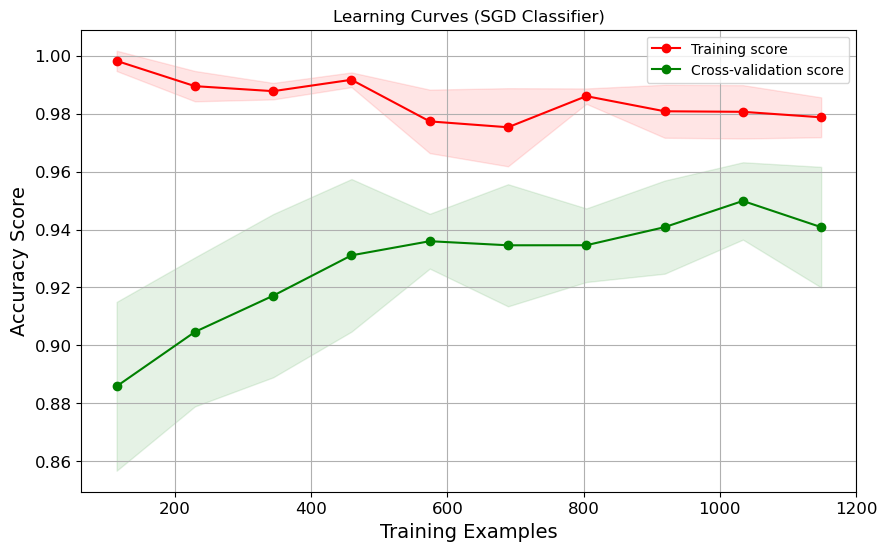

In [57]:

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np


digits = load_digits()
X, y = digits.data, digits.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


sgd_clf = SGDClassifier(random_state=42)

train_sizes, train_scores, test_scores = learning_curve(sgd_clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')


plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')

# Add labels and title
plt.title('Learning Curves (SGD Classifier)')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
#fine-tuning for random-forest classifier

In [45]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits


digits = load_digits()
X, y = digits.data, digits.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_clf = RandomForestClassifier(random_state=42)


rf_clf.fit(X_train, y_train)


y_pred = rf_clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the Random Forest Classifier: {accuracy * 100:.2f}%")


Accuracy of the Random Forest Classifier: 97.22%


In [ ]:
#Confusion matrix for RandomForestClassifier

Accuracy of the Random Forest Classifier: 97.22%


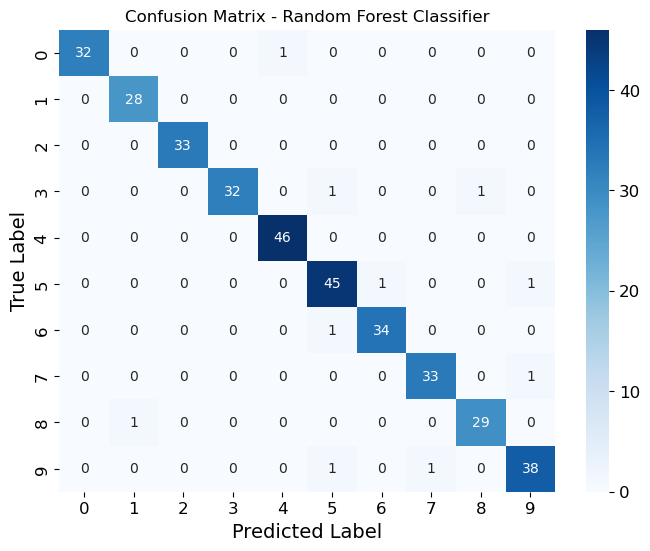

In [51]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns


digits = load_digits()
X, y = digits.data, digits.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_clf = RandomForestClassifier(random_state=42)


rf_clf.fit(X_train, y_train)


y_pred = rf_clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest Classifier: {accuracy * 100:.2f}%")


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()


In [53]:
#learning curves for random forest regressor

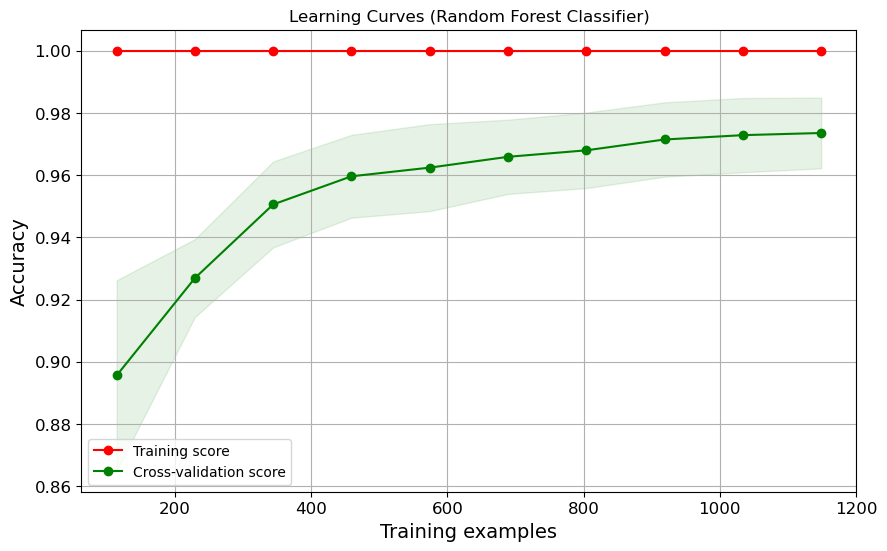

In [55]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

digits = load_digits()
X, y = digits.data, digits.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_clf = RandomForestClassifier(random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    rf_clf, X_train, y_train, cv=5, scoring='accuracy', 
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title('Learning Curves (Random Forest Classifier)')
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.show()

In [ ]:
#Comparing the acuracy of classifiers

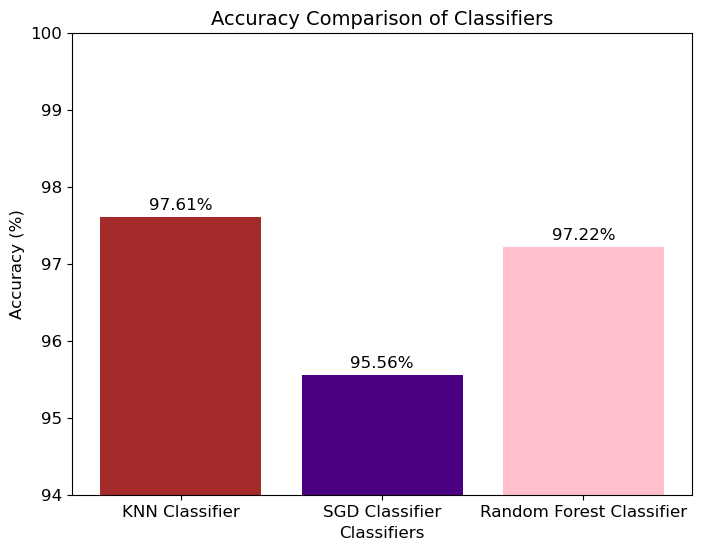

In [71]:
# Import necessary libraries
import matplotlib.pyplot as plt


classifiers = ['KNN Classifier', 'SGD Classifier', 'Random Forest Classifier']
accuracies = [97.61, 95.56, 97.22]  # Accuracies in percentage

plt.figure(figsize=(8, 6))
plt.bar(classifiers, accuracies, color=['brown', 'indigo', 'pink'])


plt.title('Accuracy Comparison of Classifiers', fontsize=14)
plt.xlabel('Classifiers', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)

for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.1, f'{accuracy:.2f}%', ha='center', fontsize=12)

plt.ylim(94, 100)  
plt.show()